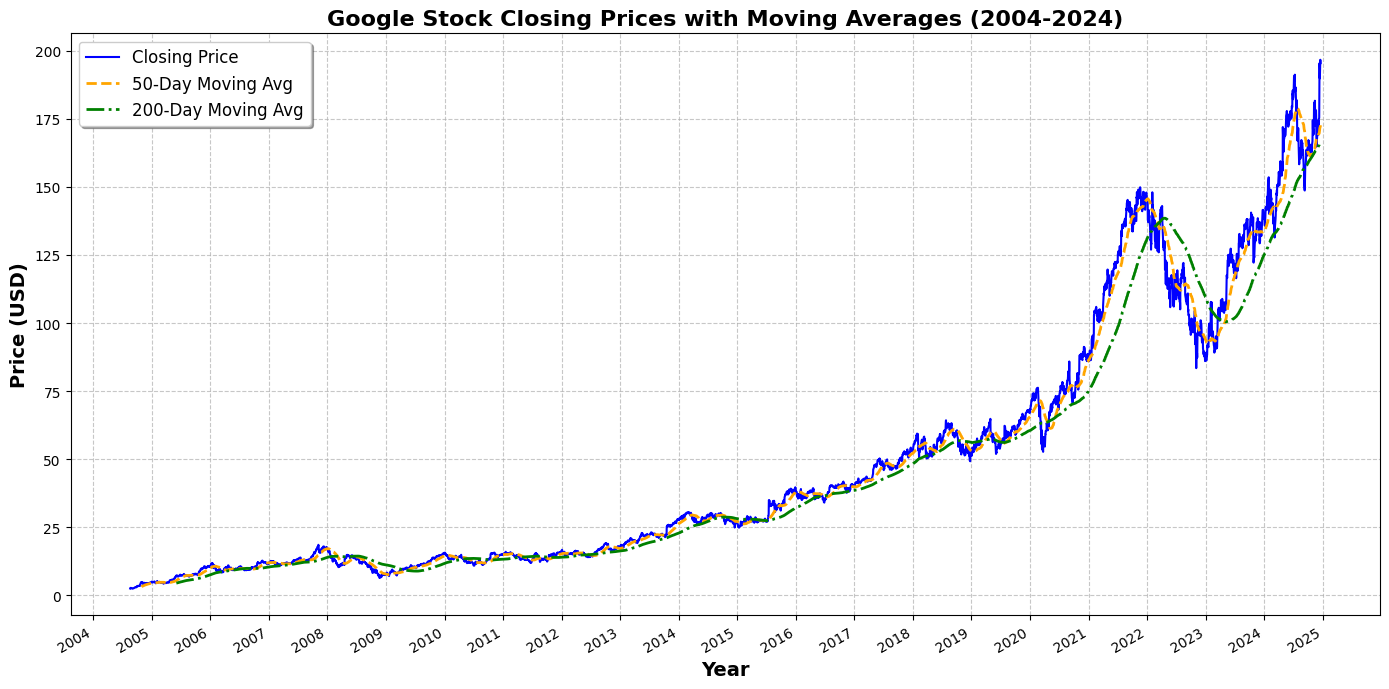

<ipython-input-32-e08b523e09cd>:37: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = data['Close'].resample('M').mean()


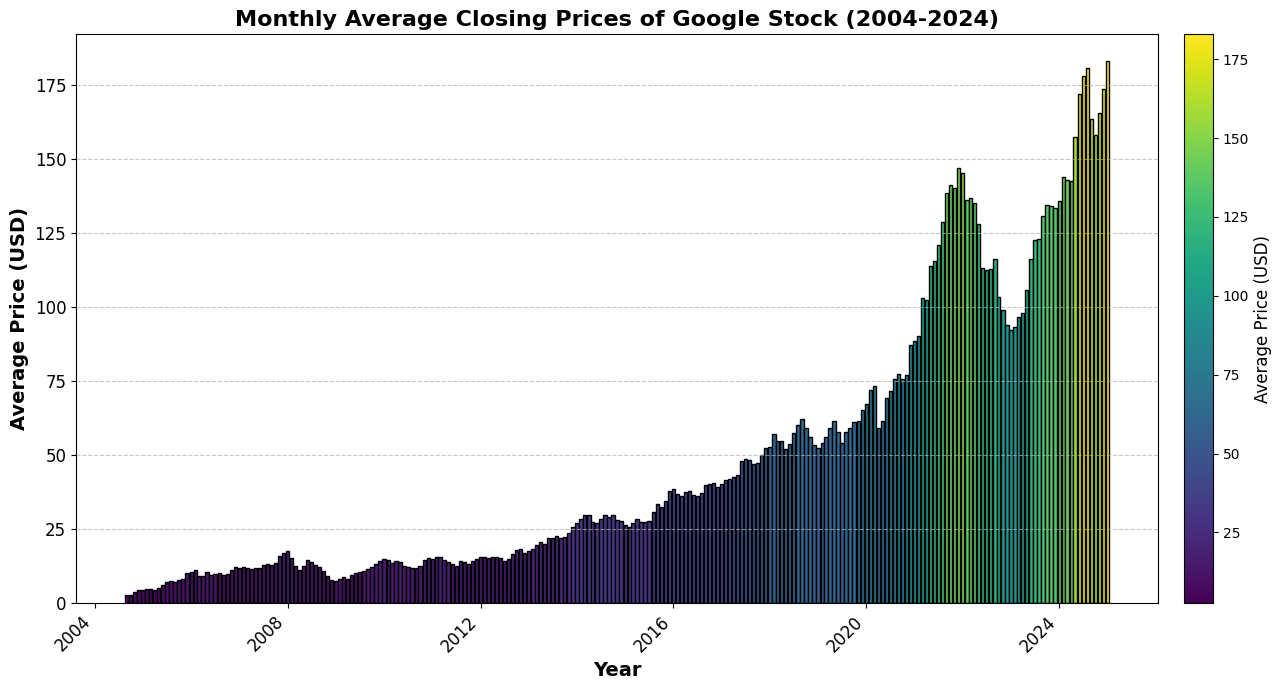

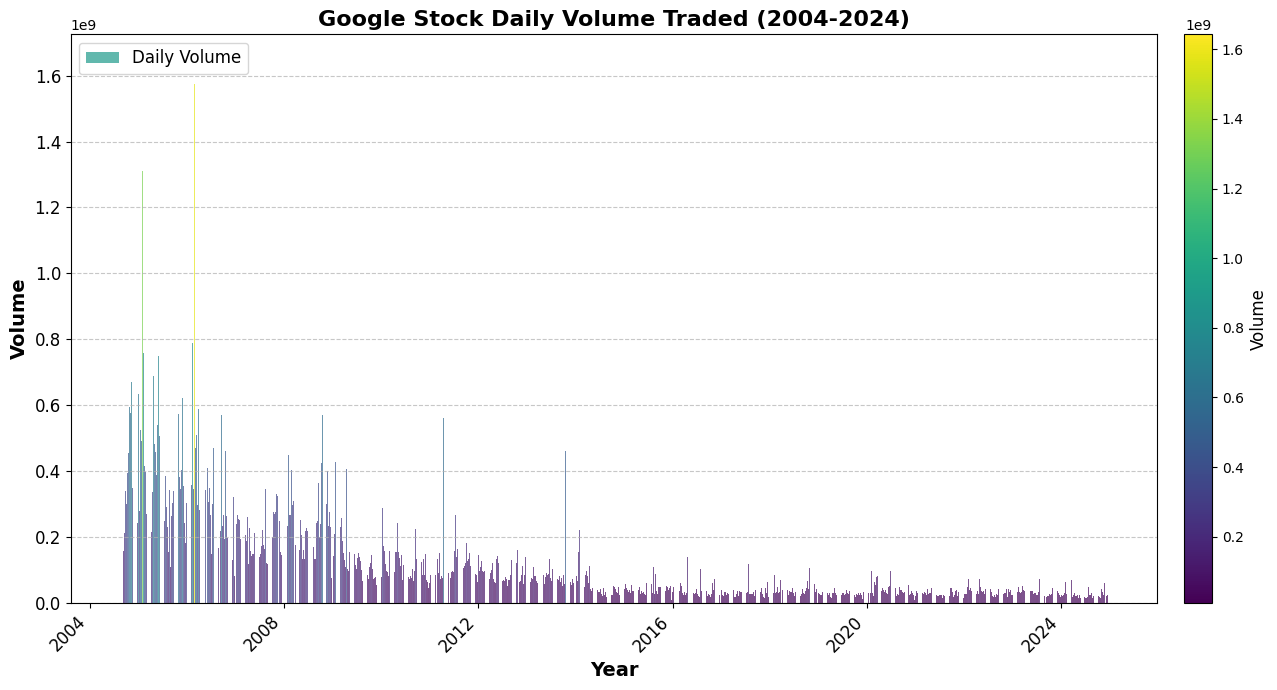

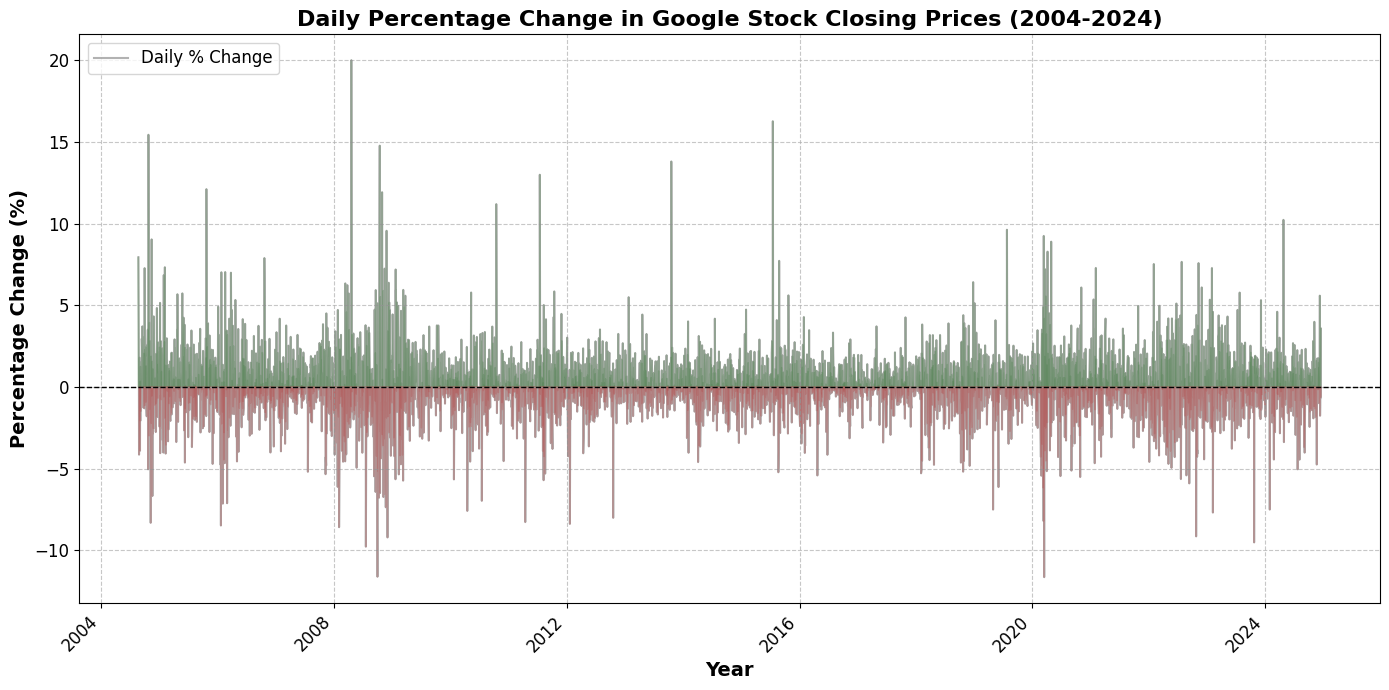

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
file_path = "GOOGL_2004-08-01_2024-12-18.csv"
df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Clean data
df = df.dropna()

def plot_moving_averages(data):
    data["50_Day_MA"] = data["Close"].rolling(window=50).mean()
    data["200_Day_MA"] = data["Close"].rolling(window=200).mean()

    plt.figure(figsize=(14, 7))
    plt.plot(data.index, data["Close"], label="Closing Price", color="blue", linewidth=1.5)
    plt.plot(data.index, data["50_Day_MA"], label="50-Day Moving Avg", color="orange", linestyle="--", linewidth=2)
    plt.plot(data.index, data["200_Day_MA"], label="200-Day Moving Avg", color="green", linestyle="-.", linewidth=2)

    plt.title("Google Stock Closing Prices with Moving Averages (2004-2024)", fontsize=16, fontweight="bold")
    plt.xlabel("Year", fontsize=14, fontweight="bold")
    plt.ylabel("Price (USD)", fontsize=14, fontweight="bold")

    plt.legend(loc="upper left", fontsize=12, frameon=True, fancybox=True, shadow=True)
    plt.grid(True, linestyle="--", alpha=0.7)

    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    plt.gcf().autofmt_xdate()

    plt.tight_layout()
    plt.show()


def plot_monthly_average_closing_prices(data):
    monthly_avg = data['Close'].resample('M').mean()

    fig, ax = plt.subplots(figsize=(14, 7))

    colors = plt.cm.viridis(monthly_avg.values / monthly_avg.values.max())

    ax.bar(monthly_avg.index, monthly_avg, color=colors, edgecolor='black', width=25)

    ax.set_title("Monthly Average Closing Prices of Google Stock (2004-2024)", fontsize=16, fontweight='bold')
    ax.set_xlabel("Year", fontsize=14, fontweight='bold')
    ax.set_ylabel("Average Price (USD)", fontsize=14, fontweight='bold')

    ax.tick_params(axis='x', labelsize=12, rotation=45)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')

    ax.tick_params(axis='y', labelsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=monthly_avg.min(), vmax=monthly_avg.max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Average Price (USD)', fontsize=12)

    plt.tight_layout()
    plt.show()


def plot_daily_volume(data):
    fig, ax = plt.subplots(figsize=(14, 7))

    colors = plt.cm.viridis(data['Volume'].values / data['Volume'].values.max())

    ax.bar(data.index, data['Volume'], color=colors, alpha=0.7, label="Daily Volume", width=1)

    ax.set_title("Google Stock Daily Volume Traded (2004-2024)", fontsize=16, fontweight='bold')
    ax.set_xlabel("Year", fontsize=14, fontweight='bold')
    ax.set_ylabel("Volume", fontsize=14, fontweight='bold')

    ax.tick_params(axis='x', labelsize=12, rotation=45)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')

    ax.tick_params(axis='y', labelsize=12)

    ax.legend(fontsize=12, loc='upper left')

    sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=data['Volume'].min(), vmax=data['Volume'].max()))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label('Volume', fontsize=12)

    ax.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


def plot_daily_percentage_change(data):
    daily_pct_change = data['Close'].pct_change() * 100

    fig, ax = plt.subplots(figsize=(14, 7))

    ax.plot(daily_pct_change.index, daily_pct_change, color='gray', alpha=0.6, label="Daily % Change", linewidth=1.5)
    ax.fill_between(daily_pct_change.index, daily_pct_change, 0, where=(daily_pct_change > 0), color='green', alpha=0.3, interpolate=True)
    ax.fill_between(daily_pct_change.index, daily_pct_change, 0, where=(daily_pct_change < 0), color='red', alpha=0.3, interpolate=True)

    ax.axhline(0, color='black', linestyle='--', linewidth=1)

    ax.set_title("Daily Percentage Change in Google Stock Closing Prices (2004-2024)", fontsize=16, fontweight='bold')
    ax.set_xlabel("Year", fontsize=14, fontweight='bold')
    ax.set_ylabel("Percentage Change (%)", fontsize=14, fontweight='bold')

    ax.tick_params(axis='x', labelsize=12, rotation=45)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')

    ax.tick_params(axis='y', labelsize=12)

    ax.legend(fontsize=12, loc='upper left')

    ax.grid(axis='both', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Call the functions to generate the plots
plot_moving_averages(df)
plot_monthly_average_closing_prices(df)
plot_daily_volume(df)
plot_daily_percentage_change(df)